In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path as P
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']  # 汉字字体,优先使用楷体，如果找不到楷体，则使用黑体
plt.rcParams['font.size'] = 12  # 字体大小
plt.rcParams['axes.unicode_minus'] = False  # 正常显示负号
from collections import defaultdict
import plotly.express as px

问题二要求在土壤湿度（因变量）和蒸发量、降水（自变量）之间建立模型，
这里在建模之前，对这些变量的相关性进行分析，并且再选一些相关性高的变量。
这是一种手工选择特征的办法。

In [70]:
df = pd.read_csv('./附件3-湿度-预处理.csv', index_col='time')
df_H=df
df.columns

Index(['month', 'year', '10cm湿度(kg/m2)', '40cm湿度(kg/m2)', '100cm湿度(kg/m2)',
       '200cm湿度(kg/m2)'],
      dtype='object')

In [71]:
YCOLS=['10cm湿度(kg/m2)', '40cm湿度(kg/m2)', '100cm湿度(kg/m2)'] # 不考虑200cm深度，因为它基本不变。
H_COLS=YCOLS

In [72]:
df = pd.read_csv('./附件4-土壤蒸发量-预处理.csv', index_col='time')
df_SoilEvap=df

In [73]:
YCOLS=[ '土壤蒸发量(W/m2)', '土壤蒸发量(mm)']
SOIL_EVAP_COLS=YCOLS

In [74]:
df = pd.read_csv('附件8-气候-预处理.csv',index_col='time')
df_Climate=df

In [75]:
TEMP_COLS=[col for col in df.columns if col.endswith('(℃)')]
df_Temp=df_Climate[TEMP_COLS]
TEMP_COLS
WIND_COLS=[col for col in df.columns if col.endswith('(knots)')]
df_Wind=df_Climate[WIND_COLS]
WIND_COLS
VIS_COLS=[col for col in df.columns if col.endswith('(km)')]
df_Vis=df_Climate[VIS_COLS]
VIS_COLS
PRESS_COLS=[col for col in df.columns if col.endswith('(hPa)')]
df_Press=df_Climate[PRESS_COLS]
PRESS_COLS
DAYS_COLS=[col for col in df.columns if col.endswith('天数')]
df_Days=df_Climate[DAYS_COLS]
DAYS_COLS
RAIN_COLS=[col for col in df.columns if col.endswith('(mm)')]

df_Rain=df_Climate[RAIN_COLS]


In [76]:
X_list=[ df_Temp, df_Wind, df_Rain, df_Days, df_Vis, df_Press]#自变量
Y_list=[df_H, df_SoilEvap]#因变量


In [77]:
Y_list=[df.drop(columns=['month','year']) for df in Y_list]

In [78]:
# 将自变量和因变量进行日期对齐。
XY_list=X_list+Y_list
df=XY_list[0].join(XY_list[1:], how='inner')
df_All=df

In [79]:
df.to_csv('问题2-自变量因变量表.csv')

In [80]:
df_corr_list=[] # 记录每个变量对因变量的相关系数

In [81]:
def plotCorr(xcorr, title):
    #设置右上三角不绘制
    plt.figure(figsize=(8,8))
    #mask为 和相关系数矩阵xcorr一样大的 全0(False)矩阵
    mask = np.zeros_like(xcorr, dtype=bool)
    # 将mask右上三角(列号》=行号)设置为True
    mask[np.triu_indices_from(mask)] = True
    #cmap是设置热图的颜色
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    #绘制热图
    g = sns.heatmap(xcorr, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
    plt.title(title)
    #  xcorr : 数据矩阵
    #  mask : 为True的元素对应位置不会画出来（mask面具的意义）
    #  cmap: 颜色设置
    #  square: （True）代表行列长度一致，且绘制的每个也是方格
    #  annot ： 在格内显示数据
    #  fmt ：数据格式

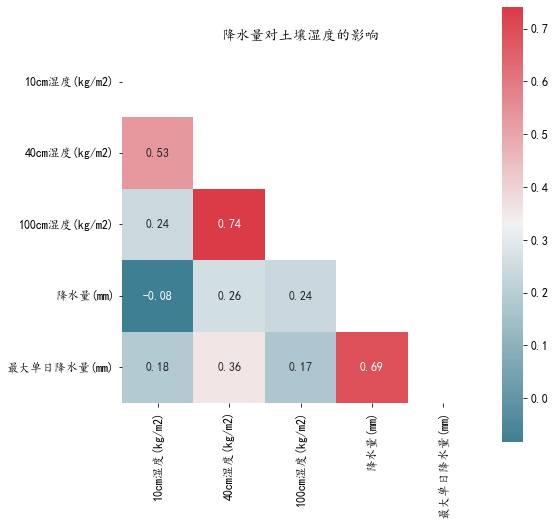

In [82]:
df_corr=df[H_COLS+RAIN_COLS].corr()
df_corr_list.append(df_corr.loc[RAIN_COLS, H_COLS])
plotCorr(df_corr, '降水量对土壤湿度的影响')

1. 

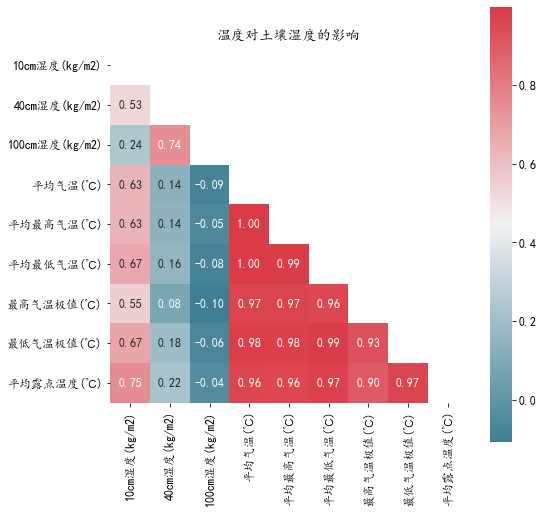

In [83]:
df_corr=df[H_COLS+TEMP_COLS].corr()
df_corr_list.append(df_corr.loc[TEMP_COLS, H_COLS])
plotCorr(df_corr, '温度对土壤湿度的影响')

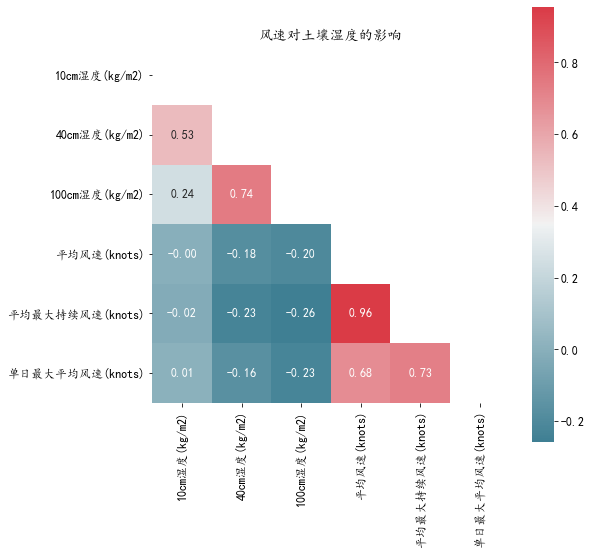

In [84]:
df_corr=df[H_COLS+WIND_COLS].corr()
df_corr_list.append(df_corr.loc[WIND_COLS, H_COLS])
plotCorr(df_corr, '风速对土壤湿度的影响')

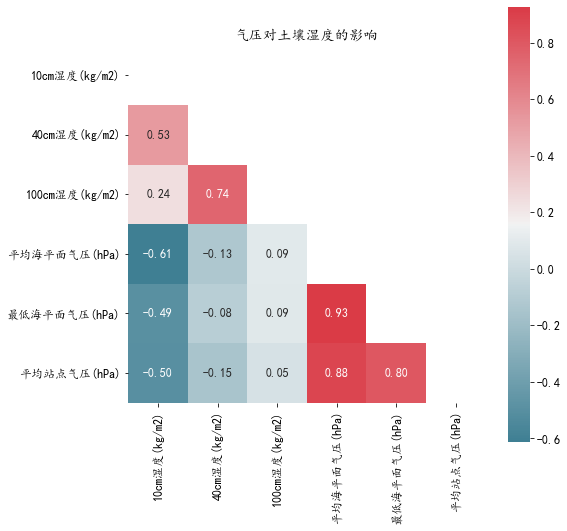

In [85]:
df_corr=df[H_COLS+PRESS_COLS].corr()
df_corr_list.append(df_corr.loc[PRESS_COLS, H_COLS])
plotCorr(df_corr, '气压对土壤湿度的影响')

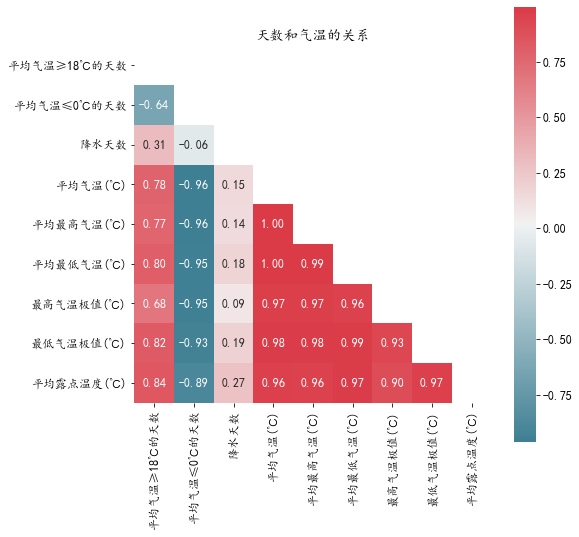

In [86]:
df_corr=df[DAYS_COLS+TEMP_COLS].corr()
plotCorr(df_corr, '天数和气温的关系')

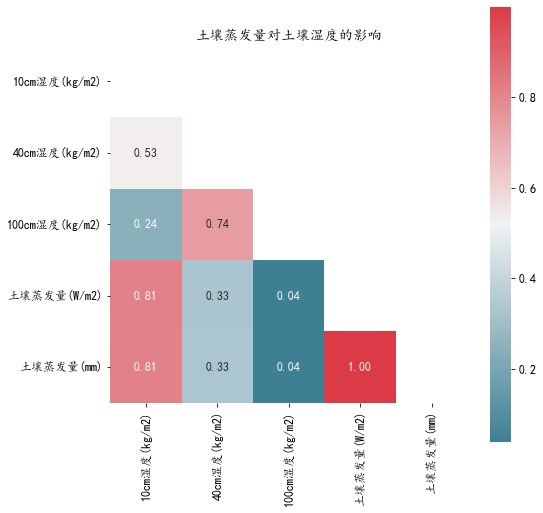

In [87]:
df_corr=df[H_COLS+SOIL_EVAP_COLS].corr()
df_corr_list.append(df_corr.loc[SOIL_EVAP_COLS, H_COLS])
plotCorr(df_corr, '土壤蒸发量对土壤湿度的影响')

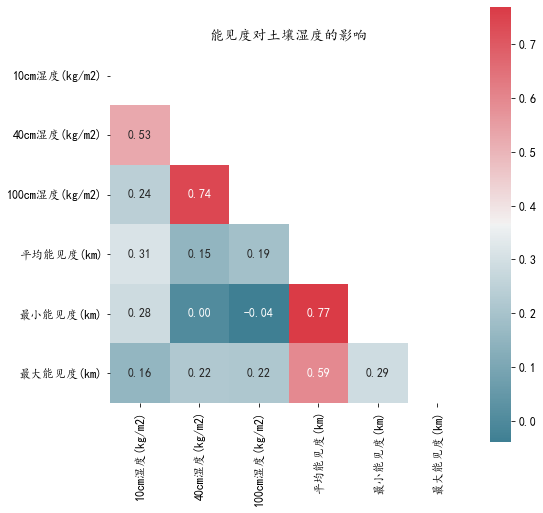

In [88]:
df_corr=df[H_COLS+VIS_COLS].corr()
df_corr_list.append(df_corr.loc[VIS_COLS, H_COLS])
plotCorr(df_corr, '能见度对土壤湿度的影响')

能见度对不同深度的土壤湿度都没有显著的影响。

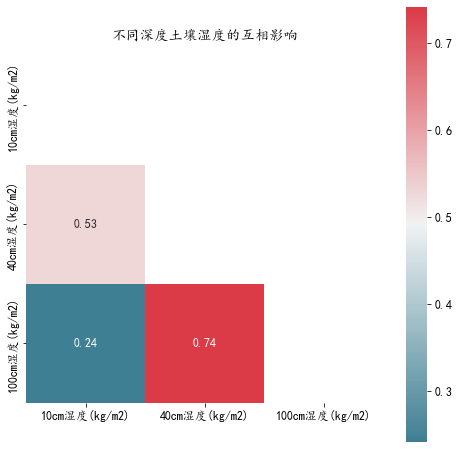

In [89]:
df_corr=df[H_COLS].corr()
plotCorr(df_corr, '不同深度土壤湿度的互相影响')

1. 40cm和100cm的湿度呈现高度的正相关；
2. 10cm和100cm的湿度呈现高度的负相关；
3. 10cm和40cm的湿度呈现中度的正相关；

可能的解释：
1. 相邻层面的湿度呈现正相关，比如10和40,40和100；
2. 最深层和最浅层的湿度是负相关，可能因为水从浅层渗透到深层；

In [90]:
df=pd.concat(df_corr_list).abs()
df

,10cm湿度(kg/m2),40cm湿度(kg/m2),100cm湿度(kg/m2)
降水量(mm),0.082812,0.256206,0.236984
最大单日降水量(mm),0.184470,0.356570,0.171895
平均气温(℃),0.634830,0.136755,0.085383
平均最高气温(℃),0.632798,0.144604,0.054182
平均最低气温(℃),0.666587,0.157085,0.084854
最高气温极值(℃),0.550871,0.081406,0.104792
最低气温极值(℃),0.672587,0.183864,0.063484
平均露点温度(℃),0.750773,0.222186,0.040296
平均风速(knots),0.002884,0.178671,0.201186
平均最大持续风速(knots),0.022897,0.228624,0.256866


In [91]:
df.to_csv('各变量对土壤湿度因变量的相关系数.csv')

In [92]:
for col in df.columns:
    ss = df[col].sort_values(ascending=False)
    ss = ss.iloc[:5]
    print(ss)
    print(ss.index.to_list()+[col])
    print()

土壤蒸发量(mm)      0.814474
土壤蒸发量(W/m2)    0.813381
平均露点温度(℃)      0.750773
最低气温极值(℃)      0.672587
平均最低气温(℃)      0.666587
Name: 10cm湿度(kg/m2), dtype: float64
['土壤蒸发量(mm)', '土壤蒸发量(W/m2)', '平均露点温度(℃)', '最低气温极值(℃)', '平均最低气温(℃)', '10cm湿度(kg/m2)']

最大单日降水量(mm)        0.356570
土壤蒸发量(mm)          0.332594
土壤蒸发量(W/m2)        0.329817
降水量(mm)            0.256206
平均最大持续风速(knots)    0.228624
Name: 40cm湿度(kg/m2), dtype: float64
['最大单日降水量(mm)', '土壤蒸发量(mm)', '土壤蒸发量(W/m2)', '降水量(mm)', '平均最大持续风速(knots)', '40cm湿度(kg/m2)']

平均最大持续风速(knots)    0.256866
降水量(mm)            0.236984
单日最大平均风速(knots)    0.228271
最大能见度(km)          0.215576
平均风速(knots)        0.201186
Name: 100cm湿度(kg/m2), dtype: float64
['平均最大持续风速(knots)', '降水量(mm)', '单日最大平均风速(knots)', '最大能见度(km)', '平均风速(knots)', '100cm湿度(kg/m2)']

